In [1]:
import numpy as np
import pandas as pd
from ggplot import *
import matplotlib.pyplot as plt

import sklearn
from sklearn.mixture import GaussianMixture

%matplotlib inline 

/usr/local/lib/python2.7/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python2.7/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
nyc_long = (-73.75, -74.05)
nyc_lat = (40.4, 40.9)

train=pd.read_json('../data/train.json')
test=pd.read_json('../data/test.json')
train['source']='train'
test['source']='test'
data=pd.concat([train, test]) 
stations = pd.read_json('../data/stations.json')
data = data.join(stations.set_index('listing_id'), on='listing_id')

In [3]:
# Enforce bounding box around city. 
# Some rentals have (long, lat) = (0, 0). 
# Others are in random parts of the US.

data = data[(data.longitude > min(nyc_long)) & 
            (data.longitude < max(nyc_long)) &
            (data.latitude > min(nyc_lat))   & 
            (data.latitude < max(nyc_lat))]

data = data[data.price < (data.price.mean() + data.price.std())]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123366 entries, 10 to 99999
Data columns (total 21 columns):
bathrooms            123366 non-null float64
bedrooms             123366 non-null int64
building_id          123366 non-null object
created              123366 non-null object
description          123366 non-null object
display_address      123366 non-null object
features             123366 non-null object
interest_level       49110 non-null object
latitude             123366 non-null float64
listing_id           123366 non-null int64
longitude            123366 non-null float64
manager_id           123366 non-null object
photos               123366 non-null object
price                123366 non-null int64
source               123366 non-null object
street_address       123366 non-null object
station_0            123366 non-null float64
station_1            123366 non-null float64
station_2            123366 non-null float64
station_dist_mean    123366 non-null float64
statio

In [17]:
data.groupby('interest_level').station_0.count()

interest_level
high       3827
low       34075
medium    11208
Name: station_0, dtype: int64

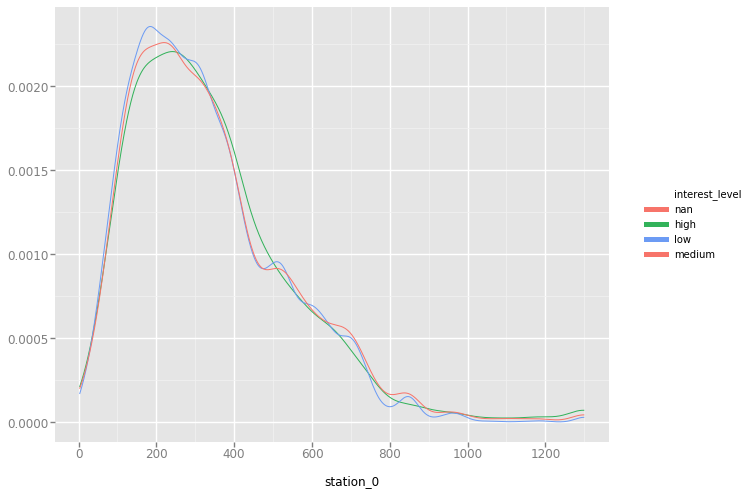

In [23]:
plot = ggplot(aes(x='station_0', color='interest_level'), data=data) + geom_density()
plot.show()

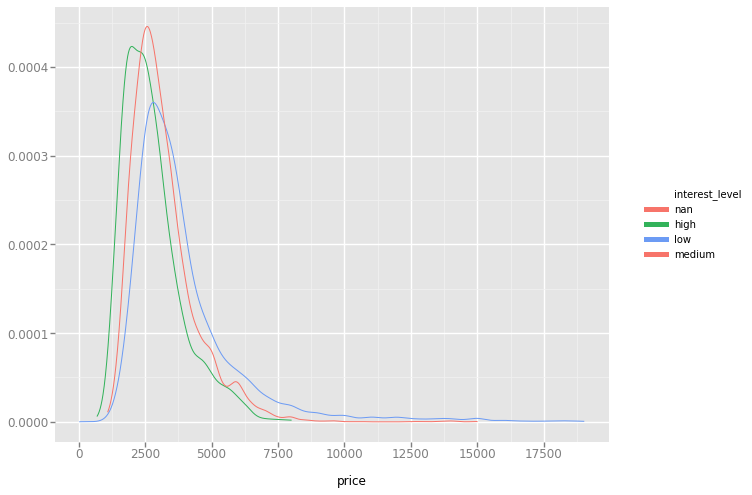

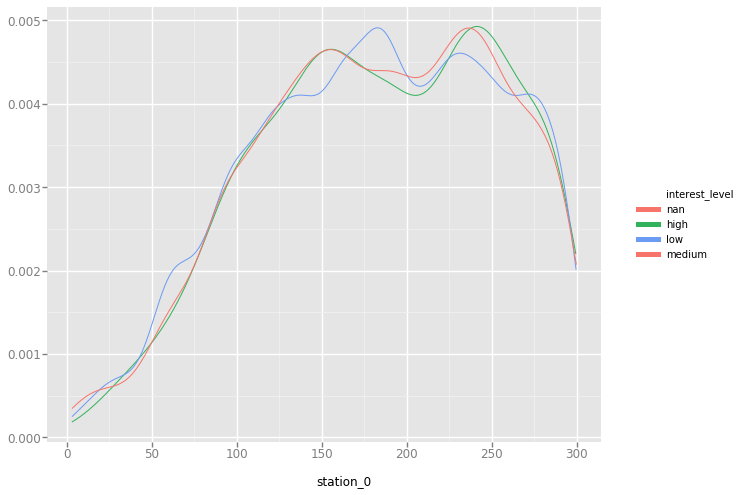

In [50]:
df = data[data.station_0 < 300]
plot = ggplot(aes(x='price', color='interest_level'), data=df) + geom_density()
plot.show()
plot = ggplot(aes(x='station_0', color='interest_level'), data=df) + geom_density()
plot.show()

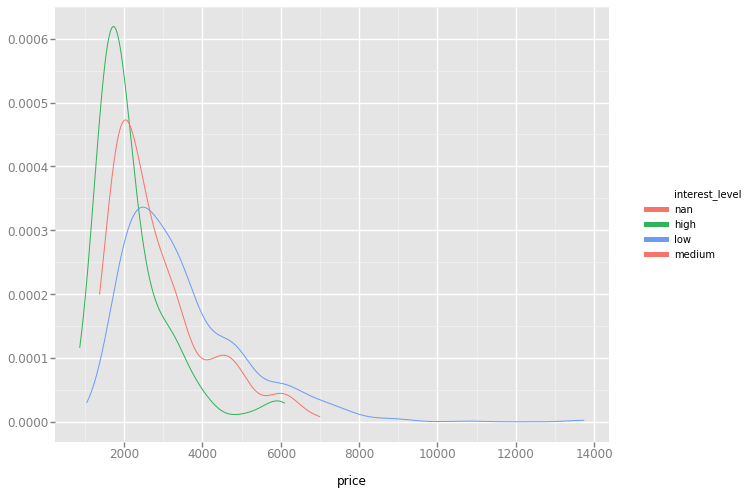

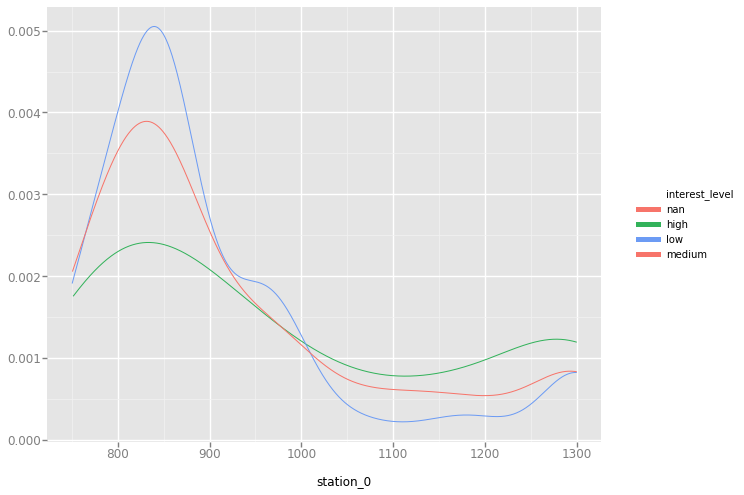

In [49]:
df = data[data.station_0 > 750]
plot = ggplot(aes(x='price', color='interest_level'), data=df) + geom_density()
plot.show()
plot = ggplot(aes(x='station_0', color='interest_level'), data=df) + geom_density()
plot.show()

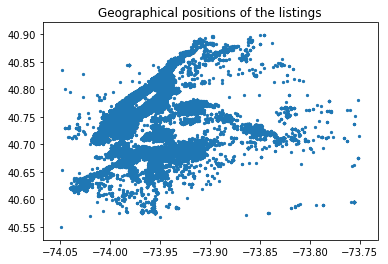

In [52]:
plt.scatter(data["longitude"], data["latitude"], s=5)
plt.title('Geographical positions of the listings');

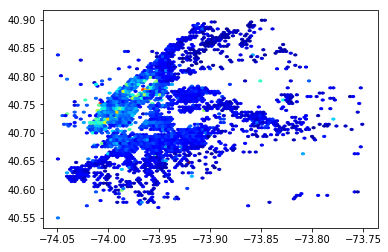

In [59]:
from matplotlib import cm
plt.hexbin(data["longitude"], data["latitude"], C=data.priceprice'], cmap=cm.jet, bins=None)